# IMPORT LIBRARY

In [ ]:
from PIL import Image
import IPython.display as display
import os
import numpy as np
import glob
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

from tensorflow import keras
import tensorflow as tf

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Model
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.optimizers.legacy import Adam

# IMAGE LOADING FROM DIC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test_data_dir = "/content/drive/MyDrive/Capstone C23-PC619/3. Dataset/Fauna/Animal Dataset/test"
train_data_dir = "/content/drive/MyDrive/Capstone C23-PC619/3. Dataset/Fauna/Animal Dataset/train"
animals = ['Spider', 'Snake', 'Sheep', 'Pig', 'Mouse', 'Monkey', 'Horse', 'Hamster', 'Frog', 'Fish', 'Duck', 'Chicken', 'Butterfly']
num_classes = len(animals)

In [ ]:
file_paths = [] # file_paths for targets
targets = []
for animal in animals:
    animal_dir = os.path.join(train_data_dir,animal)
    for file in os.listdir(animal_dir):
        file_paths.append(os.path.join(animal_dir, file))
        targets.append(animals.index(animal))

In [ ]:
print(file_paths)

['/content/drive/MyDrive/Capstone C23-PC619/3. Dataset/Fauna/Animal Dataset/train/Spider/00b63d8b0353b464.jpg', '/content/drive/MyDrive/Capstone C23-PC619/3. Dataset/Fauna/Animal Dataset/train/Spider/007096312eee24b4.jpg', '/content/drive/MyDrive/Capstone C23-PC619/3. Dataset/Fauna/Animal Dataset/train/Spider/001c7e52adc61910.jpg', '/content/drive/MyDrive/Capstone C23-PC619/3. Dataset/Fauna/Animal Dataset/train/Spider/0075dc42870a7ca2.jpg', '/content/drive/MyDrive/Capstone C23-PC619/3. Dataset/Fauna/Animal Dataset/train/Spider/007070c9fa90a932.jpg', '/content/drive/MyDrive/Capstone C23-PC619/3. Dataset/Fauna/Animal Dataset/train/Spider/0029cbe9886d8a93.jpg', '/content/drive/MyDrive/Capstone C23-PC619/3. Dataset/Fauna/Animal Dataset/train/Spider/00038fb5d16ffb85.jpg', '/content/drive/MyDrive/Capstone C23-PC619/3. Dataset/Fauna/Animal Dataset/train/Spider/00a2abe935445aad.jpg', '/content/drive/MyDrive/Capstone C23-PC619/3. Dataset/Fauna/Animal Dataset/train/Spider/00a3333351746b8d.jpg', 

In [ ]:
print(targets)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# PRE-PROCESSING

In [ ]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

image_count = len(file_paths)
BATCH_SIZE = 32 
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

train_data_gen = img_gen.flow_from_directory(directory=train_data_dir,
                                             follow_links = True,
                                             batch_size=BATCH_SIZE,
                                             target_size=(IMG_HEIGHT, IMG_WIDTH),
                                             shuffle=True,
                                             classes = (animals))


test_data_gen  = img_gen.flow_from_directory(directory=test_data_dir,
                                             follow_links = True,
                                             batch_size=BATCH_SIZE,
                                             target_size=(IMG_HEIGHT, IMG_WIDTH),
                                             shuffle=True,
                                             classes = (animals))

Found 7124 images belonging to 13 classes.
Found 2295 images belonging to 13 classes.


# Visualisasi

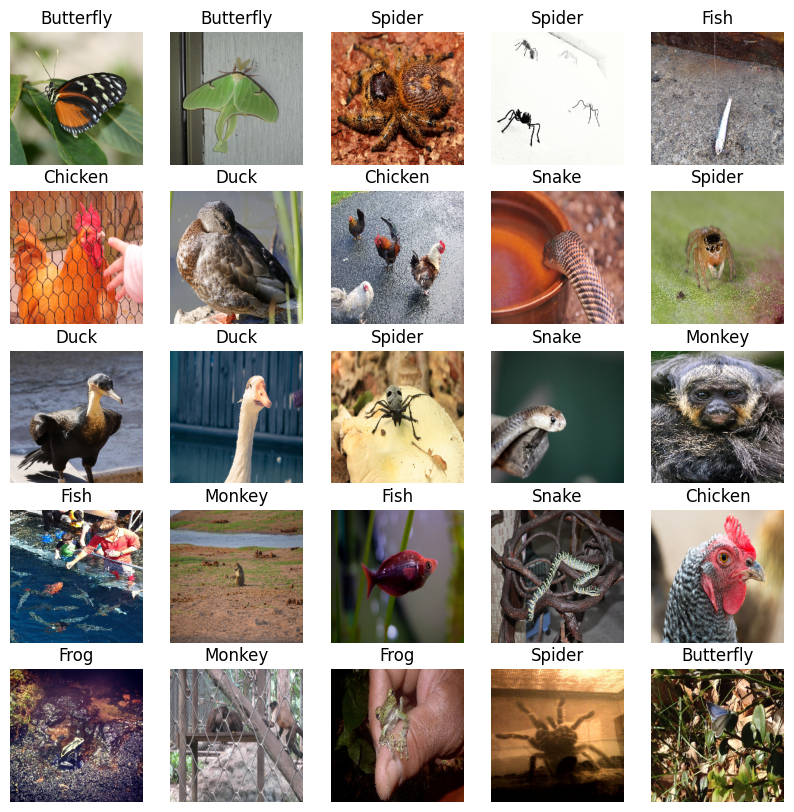

In [ ]:
import matplotlib.pyplot as plt

# You need to turn the classes into a numpy array
animal_np = np.array(animals)

def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(animal_np[label_batch[n]==1][0].title())
      plt.axis('off')

image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

# MODELLING

Using Pre-Trained Model

In [ ]:
pre_model = tf.keras.applications.VGG16(
    include_top = False,
    input_shape = (IMG_HEIGHT, IMG_WIDTH, 3),
    weights='imagenet')

for layer in pre_model.layers:  
    layer.trainable = False
    
# add a flatenning layer and output layer.
FlattenedLayer = Flatten()(pre_model.output)
OutputLayer = Dense(num_classes, activation='softmax')(FlattenedLayer)

pre_model = Model(inputs=(IMG_HEIGHT, IMG_WIDTH, 3), outputs=OutputLayer)

pre_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

553467096/553467096 [==============================] - 5s 0us/step


In [ ]:
print(pre_model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
pre_model.fit(train_data_gen,
                    validation_data=test_data_gen, 
                    epochs=50, verbose=1)

NameError: ignored

Using Custom Model

In [ ]:
#Percobaan Model(Yasin)
input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, kernel_size=(5,5), input_shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(1,1), input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(1,1), input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

# TRAINING

In [ ]:
history = model.fit(train_data_gen,
                    validation_data=test_data_gen,
                    epochs=5,
                    verbose=1)

Epoch 1/5


InvalidArgumentError: ignored

# EVALUATE

In [ ]:
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_data_gen, verbose=1)

# Saved Model

In [ ]:
saved_model_path = "./my_model.h5"

tf.saved_model.save(model, saved_model_path)

In [ ]:
# Select mode of optimization
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)